In [5]:
# add path (for local)
import sys
repo_root = "../"
if repo_root not in sys.path:
    sys.path.insert(0, repo_root)

In [6]:
%load_ext autoreload
%autoreload 2

from rdkit import RDLogger
from utils import conf_from_yaml, generator_from_conf
RDLogger.DisableLog('rdApp.*') # use debug: true to log invalid mols

def generate_and_analyze(generator, conf):
    generator.generate(time_limit=conf.get("time_limit"), max_generations=conf.get("max_generations"))
    generator.plot(**conf.get("plot_args", {}))
    generator.analyze()

def queue_generations(*args: str):
    for yaml_path in args:
        conf = conf_from_yaml(yaml_path, repo_root)
        generator = generator_from_conf(conf, repo_root)
        generate_and_analyze(generator, conf)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


seed: 1752816998
Starting generation...
<Best reward updated> 1 - time: 0.00, reward: 0.7704, node: C=C1CCC[C@H]1NC(=O)NCc1c(C)noc1C
<Best reward updated> 13 - time: 0.26, reward: 0.7765, node: Cc1occc1C(=O)NCC1(CCO)CC1
<Best reward updated> 18 - time: 0.32, reward: 0.9350, node: C=CC[NH+](CC(=O)[O-])[C@@H](C)CS(C)(=O)=O
100 - time: 1.28, average over 100: 0.2687
200 - time: 2.52, average over 100: 0.2706
300 - time: 3.71, average over 100: 0.4648
400 - time: 4.93, average over 100: 0.5255
Generation interrupted by user (KeyboardInterrupt).
Generation finished.


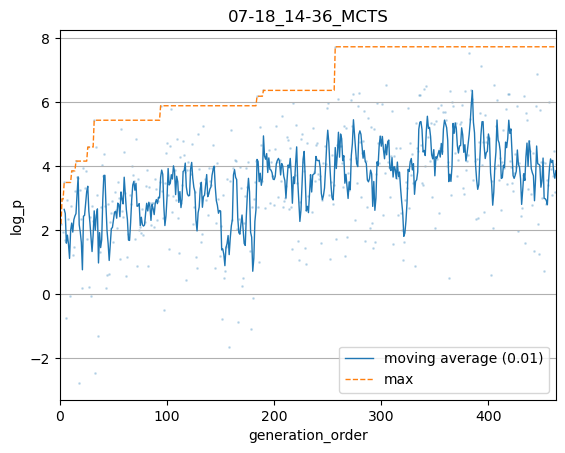

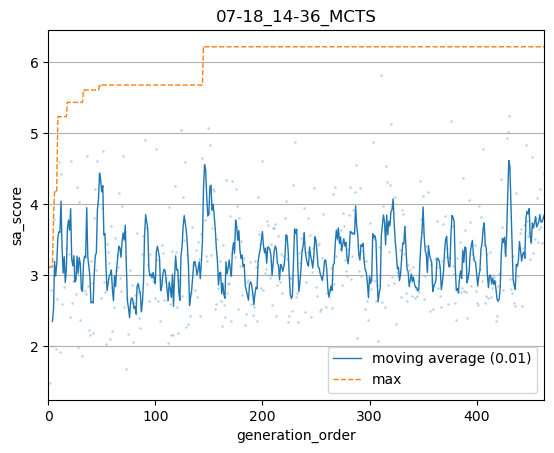

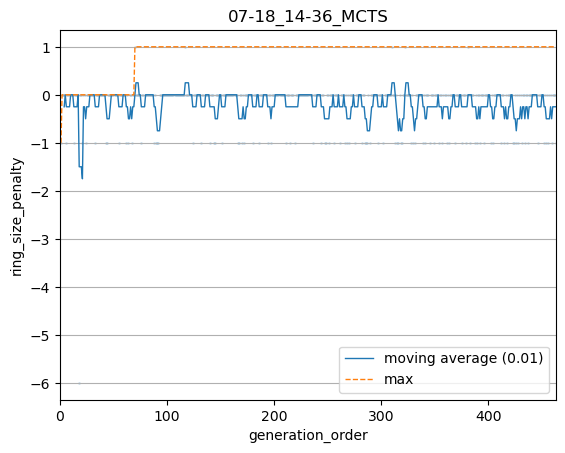

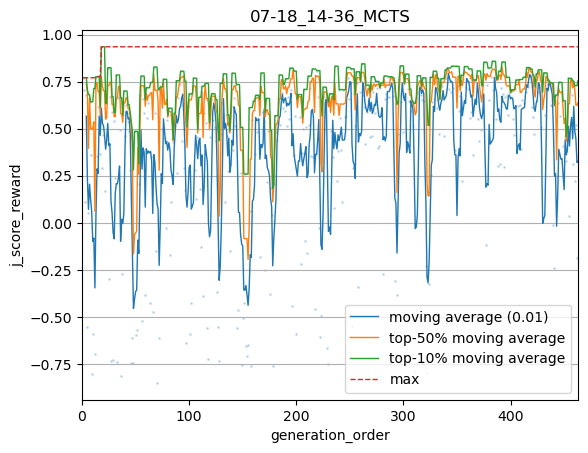

number of generated nodes: 463
valid rate: 0.913894324853229
unique rate: 0.9921722113502935
node_per_sec: 81.6317907697559
best_reward: 0.9349970883308646
average_reward: 0.39773536838824514
top_10_auc: 0.03418801892505761


In [7]:
# start generation

# yaml_path = "config/mcts_helm.yaml"
yaml_path = "config/mcts_smiles.yaml"
# yaml_path = "config/model_test.yaml"
# yaml_path = "config/mcts_d_score.yaml"
# yaml_path = "config/mcts_biot5.yaml"
# yaml_path = "config/mcts_smirks.yaml"
# yaml_path = "config/mcts_jensen.yaml"
# yaml_path = "config/heapq_smiles.yaml"
# yaml_path = "config/mol_opt/jnk3.yaml"

conf = conf_from_yaml(yaml_path, repo_root)
generator = generator_from_conf(conf, repo_root)
generate_and_analyze(generator, conf)
# queue_generations(c1, c2)

In [11]:
for key, _ in generator.top_k(10):
    print(key)

C=CC[NH+](CC(=O)[O-])[C@@H](C)CS(C)(=O)=O
Cc1sc(-c2cscc2Br)cc1C(=O)NCCCC1CC1
Cc1sc(-c2csc(OCc3ccco3)c2)nc1C(C)(C)C
Cc1sc(-c2cscc2I)c(C)c1-c1cc(C(=O)OC(C)C)no1
Cc1sc(-c2csc(-c3ccco3)n2)c(C#N)c1C
Cc1sc(-c2cscc2Br)c(C#N)c1C
Cc1sc(-c2cscc2OC(C)C)cc1N
Cc1sc([C@H](Br)CCC(C)C)nc1C1CC1
Cc1nc(-c2cscc2N=C([O-])/C=C/c2ccc(Cl)s2)sc1C
Cc1sc(-c2csc(=S)n2C)c(C)c1C


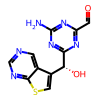

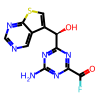

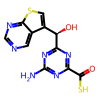

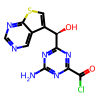

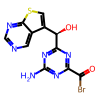

In [4]:
from utils import draw_mol
for c in generator.root.children:
    draw_mol(c.mol(), 100, 100)

In [ ]:
# continue generation
generator.generate(time_limit=conf.get("time_limit") - generator.passed_time, max_generations=conf.get("max_generations") - len(generator.unique_keys))
generator.plot(**conf.get("plot_args", {}))
generator.analyze()

In [16]:
#save mcts
save_path = generator.output_dir() + "save.mcts"
generator.save(save_path)

In [ ]:
#load generator and yaml
from generator import Generator
load_dir = "generation_result/06-26_08-51/"
conf = conf_from_yaml("sandbox/" + load_dir + "setting.yaml", repo_root)
generator = generator_from_conf(conf, repo_root)
generator = Generator.load(load_dir + "save.mcts", generator.transition)

In [ ]:
#time test
import cProfile
import pstats

profiler = cProfile.Profile()
profiler.enable()
conf = conf_from_yaml(yaml_path, repo_root)
generator = generator_from_conf(conf, repo_root)
generate_and_analyze(generator, conf)
profiler.disable()

stats = pstats.Stats(profiler)
stats.sort_stats("cumtime").print_stats(100)